# 회귀분석 예제

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

### 단순회귀분석

#### 데이터 불러오기

In [2]:
used_car = pd.read_csv("used_car.csv")
used_car.head()

,odometer,year,size,price
0,12.18,6,1,163.61
1,11.71,4,1,206.77
2,5.81,2,4,414.24
3,5.24,3,3,367.94
4,13.66,7,4,281.38


#### 산점도를 그려 선형관계 파악하기

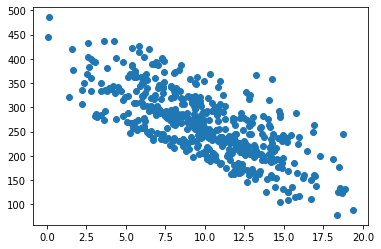

In [3]:
plt.scatter(data = used_car, x = 'odometer', y = 'price')
plt.show()

#### 회귀모형 만들기

In [4]:
used_car.lm = smf.ols('price ~ odometer', data=used_car).fit()
used_car.lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     564.2
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           5.90e-84
Time:                        23:12:17   Log-Likelihood:                -2635.1
No. Observations:                 500   AIC:                             5274.
Df Residuals:                     498   BIC:                             5283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    400.3163      6.132     65.288      0.000     388.269     412.363
odometer     -13.7601      0.579    -23.754      0.000     -14.898     -12.622
==============================================================================
Omnibus:                       16.755   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.235
Skew:                           0.430   Prob(JB):                     0.000181
Kurtosis:                       2.702   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 산점도에 회귀모형 그리기

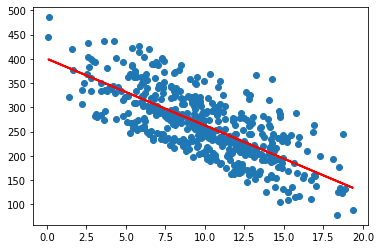

In [5]:
plt.scatter(data = used_car, x = "odometer", y = "price")
# col = 'r': 직선색을 붉은 색으로, linewidth = 2: 직선 두께를 2로
plt.plot(used_car.odometer, used_car.lm.predict(), color = 'r', linewidth = 2)
plt.show()

#### 새로운 데이터 예측하기

In [6]:
x_new = pd.DataFrame([10, 30], columns=['odometer'])

In [7]:
used_car.lm.predict(x_new)

0    262.715365
1    -12.486506
dtype: float64

# Multiple Regression : 다중회귀분석
 
 1) 종속변수 y : 만성폐쇄성폐질환 (COPD) 삶의 질 평가 검사(CAT) 증상점수
 *  COPD 평가검사(COPD assessment test, CAT)
 * CAT는 8가지 설문 사항을 통해 환자의 삶의 질 즉, 호흡기 증상, 활동 정도, 수면, 자신감을 지표로 삼고 평가
 * 0(삶의 질 가장 좋음)~40점(삶의 질 가장 나쁨)까지의 점수로 나타남 
 
2) 독립변수 x (7개)
 * age :나이, 연속형
 * sex :성별(1:남성, 0:여성), 범주형
 * FEV1%: 1초간 노력성 폐활량(Forced Expiratory Volume in One second, FEV1), 연속형, 
  - (> 70 :mild, 60-69 :moderate ,50-59:moderagely severe, 35-49:severe, <35 :very severe)
 * Smoke_pack_year : 갑년(pack-year), 사람의 담배 노출을 측정하는 데 사용되는 지표, 하루평균 담배소비량(갑)×흡연기간(년)을 의미
 * Chol :  혈중 콜레스트롤 (mg / dl 단위), 연속형
 * Comorbid : 동반질환여부 (1:유, 0:무), 범주형
 * premium : 월평균 건강보험료(소득수준 의미), 연속형
 
 * COPD 환자의 80% 이상에서 10갑년 이상의 흡연력. 을 가지며, 특히 남자에서는 90% 이상 흡연과 관련

In [8]:
df = pd.read_csv('copdcat.csv')
df

,age,sex,FEV1%,Smoke_pack_year,Chol,Comorbid,premium,CATScore
0,53,1,74.13,9.2,170.83,1,59649,7.8
1,48,1,53.24,0.0,168.82,0,47348,9.1
2,55,1,70.39,16.3,193.98,0,49599,7.6
3,62,0,69.87,44.8,215.33,1,58428,14.5
4,48,1,76.41,32.8,184.65,1,50806,11.1
...,...,...,...,...,...,...,...,...
5246,45,1,53.32,0.0,241.90,1,45933,7.1
5247,37,0,57.03,44.4,182.58,0,38004,16.8
5248,56,0,50.61,18.6,198.92,0,66896,7.3
5249,53,1,63.59,45.3,206.71,1,67557,12.2


In [9]:
X=df.drop(["CATScore"],axis=1)
y=df["CATScore"]

In [10]:
model_reg = sm.OLS(y,sm.add_constant(X))
result_reg = model_reg.fit()
result_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CATScore   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     2130.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:12:17   Log-Likelihood:                -10503.
No. Observations:                5251   AIC:                         2.102e+04
Df Residuals:                    5243   BIC:                         2.107e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.7637      0.246     39.756      0.000       9.282      10.245
age                 0.0147      0.003      4.733      0.000       0.009       0.021
sex                 0.2690      0.049      5.446      0.000       0.172       0.366
FEV1%              -0.0787      0.002    -50.431      0.000      -0.082      -0.076
Smoke_pack_year     0.1542      0.001    107.823      0.000       0.151       0.157
Chol                0.0003      0.001      0.387      0.699      -0.001       0.002
Comorbid            0.9392      0.049     19.006      0.000       0.842       1.036
premium         -1.504e-05   1.66e-06     -9.058      0.000   -1.83e-05   -1.18e-05
==============================================================================
Omnibus:                     1902.692   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20452.640
Skew:                           1.418   Prob(JB):                         0.00
Kurtosis:                      12.243   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 이상점, 영향점

In [11]:
result_influ = result_reg.get_influence().summary_frame() #slow
result_influ

,dfb_const,dfb_age,dfb_sex,dfb_FEV1%,dfb_Smoke_pack_year,dfb_Chol,dfb_Comorbid,dfb_premium,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.003124,0.004385,0.010310,0.013619,-0.006759,-0.009415,0.009749,0.002819,0.000083,0.736441,0.001218,0.025714,0.736408,0.025713
1,0.028091,-0.004868,0.025208,0.001156,-0.031895,-0.024043,-0.026036,-0.013566,0.000460,1.800328,0.001135,0.060683,1.800712,0.060696
2,-0.001345,0.002557,0.003772,0.004261,-0.001104,-0.000988,-0.003864,-0.001557,0.000009,0.268418,0.000988,0.008441,0.268394,0.008441
3,-0.030141,0.027986,-0.017474,0.019802,0.025028,0.005634,0.017702,0.003660,0.000342,1.284825,0.001655,0.052311,1.284905,0.052314
4,-0.001531,-0.001492,0.008555,0.012861,0.005823,-0.004389,0.008178,-0.002385,0.000055,0.611219,0.001167,0.020893,0.611183,0.020892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5246,0.000089,-0.001296,0.002283,0.000058,-0.002778,0.002387,0.002124,-0.001415,0.000004,0.162449,0.001211,0.005657,0.162434,0.005657
5247,0.062065,-0.055527,-0.035466,0.012481,0.045790,-0.020056,-0.036533,-0.039964,0.001428,2.604061,0.001682,0.106877,2.605498,0.106936
5248,0.003137,-0.007471,0.009201,0.001202,0.001528,0.001388,0.009462,-0.007158,0.000047,-0.680999,0.000818,-0.019490,-0.680964,-0.019489
5249,0.005108,-0.001903,-0.004494,-0.003108,-0.006317,-0.000382,-0.004424,-0.003801,0.000016,-0.319344,0.001220,-0.011161,-0.319316,-0.011160


#### Leverage Hii, Studentized Residual

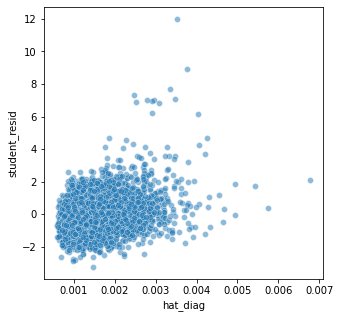

In [12]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=result_influ, y="student_resid", x="hat_diag", alpha=0.5)
plt.show()

#### Dffits, DFBETAS (FEV1%)

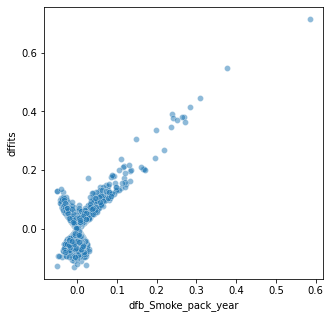

In [13]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=result_influ, y="dffits", x="dfb_Smoke_pack_year", alpha=0.5)
plt.show()

#### 영향점 상위 10개

In [14]:
result_influ_sort = result_influ.sort_values('student_resid', ascending=False)
result_influ_sort[['student_resid','hat_diag','dffits','dfb_Smoke_pack_year']].head(10)

,student_resid,hat_diag,dffits,dfb_Smoke_pack_year
3110,11.968086,0.003532,0.712515,0.586569
3405,8.937631,0.003759,0.548991,0.375621
4311,7.705960,0.003348,0.446633,0.309232
4032,7.324662,0.002477,0.364998,0.270733
2184,7.062071,0.003467,0.416570,0.284163
4947,6.998953,0.002789,0.370139,0.251364
1063,6.987678,0.002961,0.380804,0.268723
3489,6.980149,0.002907,0.376909,0.241177
2252,6.896445,0.002519,0.346549,0.236534
4197,6.856656,0.003088,0.381630,0.264482


### 다중공선성

In [15]:
selling = pd.read_csv('selling.csv')
selling

,Price,Bedrooms,HSize,LotSize
0,124100,3,1290,3900
1,218300,4,2080,6600
2,117800,3,1250,3750
3,168300,3,1550,4650
4,120400,3,1360,4050
...,...,...,...,...
95,180500,3,1320,3900
96,218100,5,2980,9000
97,117500,3,1570,4950
98,157400,3,1560,5100


In [16]:
selling.lm = smf.ols('Price ~ Bedrooms+HSize+LotSize', data=selling).fit()
selling.lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     40.73
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           4.57e-17
Time:                        23:12:25   Log-Likelihood:                -1152.6
No. Observations:                 100   AIC:                             2313.
Df Residuals:                      96   BIC:                             2324.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.772e+04   1.42e+04      2.661      0.009    9576.984    6.59e+04
Bedrooms    2306.0808   6994.192      0.330      0.742   -1.16e+04    1.62e+04
HSize         74.2968     52.979      1.402      0.164     -30.865     179.458
LotSize       -4.3638     17.024     -0.256      0.798     -38.156      29.429
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.296
Skew:                           0.102   Prob(JB):                        0.862
Kurtosis:                       2.829   Cond. No.                     3.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

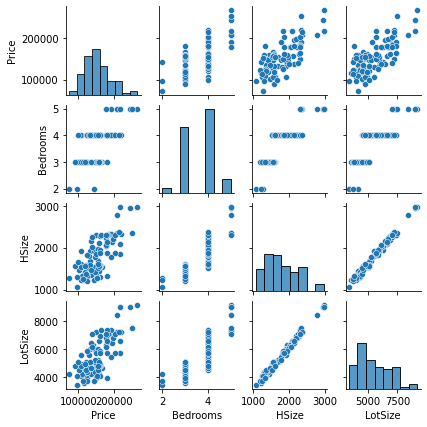

In [17]:
sns.pairplot(selling, height=1.5)

In [18]:
selling.corr()

,Price,Bedrooms,HSize,LotSize
Price,1.000000,0.645411,0.747762,0.740874
Bedrooms,0.645411,1.000000,0.846454,0.837430
HSize,0.747762,0.846454,1.000000,0.993615
LotSize,0.740874,0.837430,0.993615,1.000000


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
X=selling.drop(['Price'],axis=1)
X_design = sm.add_constant(X)
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"] = [np.round(variance_inflation_factor(X_design.values, i+1),4) 
                     for i in range(len(X.columns))] 
vif

,Features,VIF Factor
0,Bedrooms,3.5400
1,HSize,83.0668
2,LotSize,78.8413


In [21]:
X=selling.drop(['Price','LotSize'],axis=1)
X_design = sm.add_constant(X)
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"] = [np.round(variance_inflation_factor(X_design.values, i+1),4) 
                     for i in range(len(X.columns))] 
vif

,Features,VIF Factor
0,Bedrooms,3.5271
1,HSize,3.5271


### 변수선택

In [22]:
df = pd.read_csv('copdcat.csv')
df

,age,sex,FEV1%,Smoke_pack_year,Chol,Comorbid,premium,CATScore
0,53,1,74.13,9.2,170.83,1,59649,7.8
1,48,1,53.24,0.0,168.82,0,47348,9.1
2,55,1,70.39,16.3,193.98,0,49599,7.6
3,62,0,69.87,44.8,215.33,1,58428,14.5
4,48,1,76.41,32.8,184.65,1,50806,11.1
...,...,...,...,...,...,...,...,...
5246,45,1,53.32,0.0,241.90,1,45933,7.1
5247,37,0,57.03,44.4,182.58,0,38004,16.8
5248,56,0,50.61,18.6,198.92,0,66896,7.3
5249,53,1,63.59,45.3,206.71,1,67557,12.2


In [23]:
X=df.drop(["CATScore"],axis=1)
y=df["CATScore"]

In [24]:
model_reg = sm.OLS(y,sm.add_constant(X))
result_reg = model_reg.fit()
result_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CATScore   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     2130.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:12:26   Log-Likelihood:                -10503.
No. Observations:                5251   AIC:                         2.102e+04
Df Residuals:                    5243   BIC:                         2.107e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.7637      0.246     39.756      0.000       9.282      10.245
age                 0.0147      0.003      4.733      0.000       0.009       0.021
sex                 0.2690      0.049      5.446      0.000       0.172       0.366
FEV1%              -0.0787      0.002    -50.431      0.000      -0.082      -0.076
Smoke_pack_year     0.1542      0.001    107.823      0.000       0.151       0.157
Chol                0.0003      0.001      0.387      0.699      -0.001       0.002
Comorbid            0.9392      0.049     19.006      0.000       0.842       1.036
premium         -1.504e-05   1.66e-06     -9.058      0.000   -1.83e-05   -1.18e-05
==============================================================================
Omnibus:                     1902.692   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20452.640
Skew:                           1.418   Prob(JB):                         0.00
Kurtosis:                      12.243   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
import feature_selection as fsel

#### 후진제거법

In [26]:
result_back = fsel.backwardSelection(X, y, model_type="linear", elimination_criteria="aic")
result_back

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : Chol
                            OLS Regression Results                            
Dep. Variable:               CATScore   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     2486.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:12:27   Log-Likelihood:                -10503.
No. Observations:                5251   AIC:                         2.102e+04
Df Residuals:                    5244   BIC:                         2.107e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

['intercept', 'age', 'sex', 'FEV1%', 'Smoke_pack_year', 'Comorbid', 'premium']

#### 전진선택법

In [27]:
result_for = fsel.forwardSelection(X, y, model_type="linear", elimination_criteria="aic")
result_for

Character Variables (Dummies Generated, First Dummies Dropped): []
Entered : Smoke_pack_year 	AIC : 23415.977666326056
Entered : FEV1% 	AIC : 21489.584865762954
Entered : Comorbid 	AIC : 21145.807330475916
Entered : premium 	AIC : 21068.068046043445
Entered : sex 	AIC : 21040.499068836027
Entered : age 	AIC : 21020.090010391912
Break : Significance Level
                            OLS Regression Results                            
Dep. Variable:               CATScore   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     2486.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:12:27   Log-Likelihood:                -10503.
No. Observations:                5251   AIC:                         2.102e+04
Df Residuals:                    5244   BIC:                         2.107e+04
Df Model:  

['intercept', 'Smoke_pack_year', 'FEV1%', 'Comorbid', 'premium', 'sex', 'age']

####  sklearn 패키지의 RFE 함수 (비추천)

In [28]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [29]:
#표준화를 반드시 먼저 수행
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std)
X_std.columns = X.columns

In [30]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=6, step=1)
fit = rfe.fit(X_std, y)

print("Number of Features: ",fit.n_features_) 
print("Selected Features: ",X.columns[fit.support_])

Number of Features:  6
Selected Features:  Index(['age', 'sex', 'FEV1%', 'Smoke_pack_year', 'Comorbid', 'premium'], dtype='object')
